## 9.2 최대가능도 추정법

모멘트 방법으로 추정한 모수는 그 숫자가 가장 가능성 높은 값이라는 이론적 보장이 없다. 이 절에서는 이론적으로 가장 가능성이 높은 모수를 찾는 방법인 최대가능도 추정법에 대해 알아본다. 최대가능도 추정법은 모든 추정방법 중 가장 널리 사용되는 방법이다. 먼저 가능도함수에 대해 알아보고 베르누이분포, 카테고리분포, 정규분포, 다변수정규분포 등 여러 기본분포의 모수를 최대가능도 추정법으로 추정하는 방법을 공부한다.  

### 가능도함수

이제부터는 여러가지 확률분포 $X$에 대한 확률밀도함수 또는 확률질량함수를 다음과 같이 대표하여 쓰기로 한다. 

$$
\begin{align}
p(x;\theta)
\tag{9.2.1}
\end{align}
$$

이 식에서 $x$는 확률분포가 가질 수 있는 실숫값이다. $x$는 스칼라값일 수도 있고 벡터값일 수도  있다. $\theta$는 확률밀도함수의 모수를 표시하는 대표기호다. $x$와 마찬가지로 $\theta$도 스칼라일 수도 있고 벡터일 수도 있다. 

만약 확률분포가 베르누이 확률분포라면,

$$
\begin{align}
\theta = \mu
\tag{9.2.2}
\end{align}
$$

다. 만약 확률분포가 이항분포면,

$$
\begin{align}
\theta = (N,\mu)
\tag{9.2.3}
\end{align}
$$

가 된다. 또 확률분포가 정규분포라면 

$$
\begin{align}
\theta = (\mu, \sigma^2)
\tag{9.2.4}
\end{align}
$$

이다.

확률밀도함수에서는 모수 $\theta$가 이미 알고 있는 상수계수고 $x$가 변수다. 하지만 모수 추정 문제에서는 $x$ 즉, 이미 실현된 표본값은 알고 있지만 모수 $\theta$를 모르고 있다. 이때는 반대로 $x$를 이미 알고있는 상수계수로 놓고 $\theta$를 변수로 생각한다. 물론 함수의 값 자체는 변함없이 주어진 $x$가 나올 수 있는 확률밀도다. 이렇게 **확률밀도함수에서 모수를 변수로 보는 경우에 이 함수를 가능도함수(likelihood function)**라고 한다. 같은 함수를 확률밀도함수로 보면 $p(x;\theta)$로 표기하지만 가능도함수로 보면 $L(\theta;x)$ 기호로 표기한다.

$$
\begin{align}
{L}(\theta;x) = p(x;\theta)
\tag{9.2.5}
\end{align}
$$


#### 예제

정규분포의 확률밀도함수는 다음과 같은 단변수 함수다.

$$
\begin{align}
p(x; \mu_0, \sigma_0^2) = \dfrac{1}{\sqrt{2\pi\sigma_0^2}} \exp \left(-\dfrac{(x-\mu_0)^2}{2\sigma_0^2}\right)
\tag{9.2.6}
\end{align}
$$

모수가 상수라는 것을 강조하기 위해 아래첨자를 붙였다.

이때 가능도함수는 다음과 같이 입력변수가 2개인 다변수 함수가 된다. 

$$
\begin{align}
L(\mu, \sigma^2; x_0) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_0-\mu)^2}{2\sigma^2}\right)
\tag{9.2.7}
\end{align}
$$

수식은 같지만 함수의 변수가 다르다는 점에 주의하라.

예를 들어 정규분포에서 기댓값 모수와 분산 모수를 입력 변수로 가지는 가능도함수를 그리면 각각 다음과 같다. 기댓값 모수를 입력 변수로 가지는 가능도함수의 모양이 확률밀도함수와 같은 모양인 것은 ($x$와 $\mu$를 바꾸어도 식이 같아지는) 정규분포의 확률밀도함수가 가지는 특별한 성질 때문이며 아주 우연히 이렇게 된 것뿐이다.

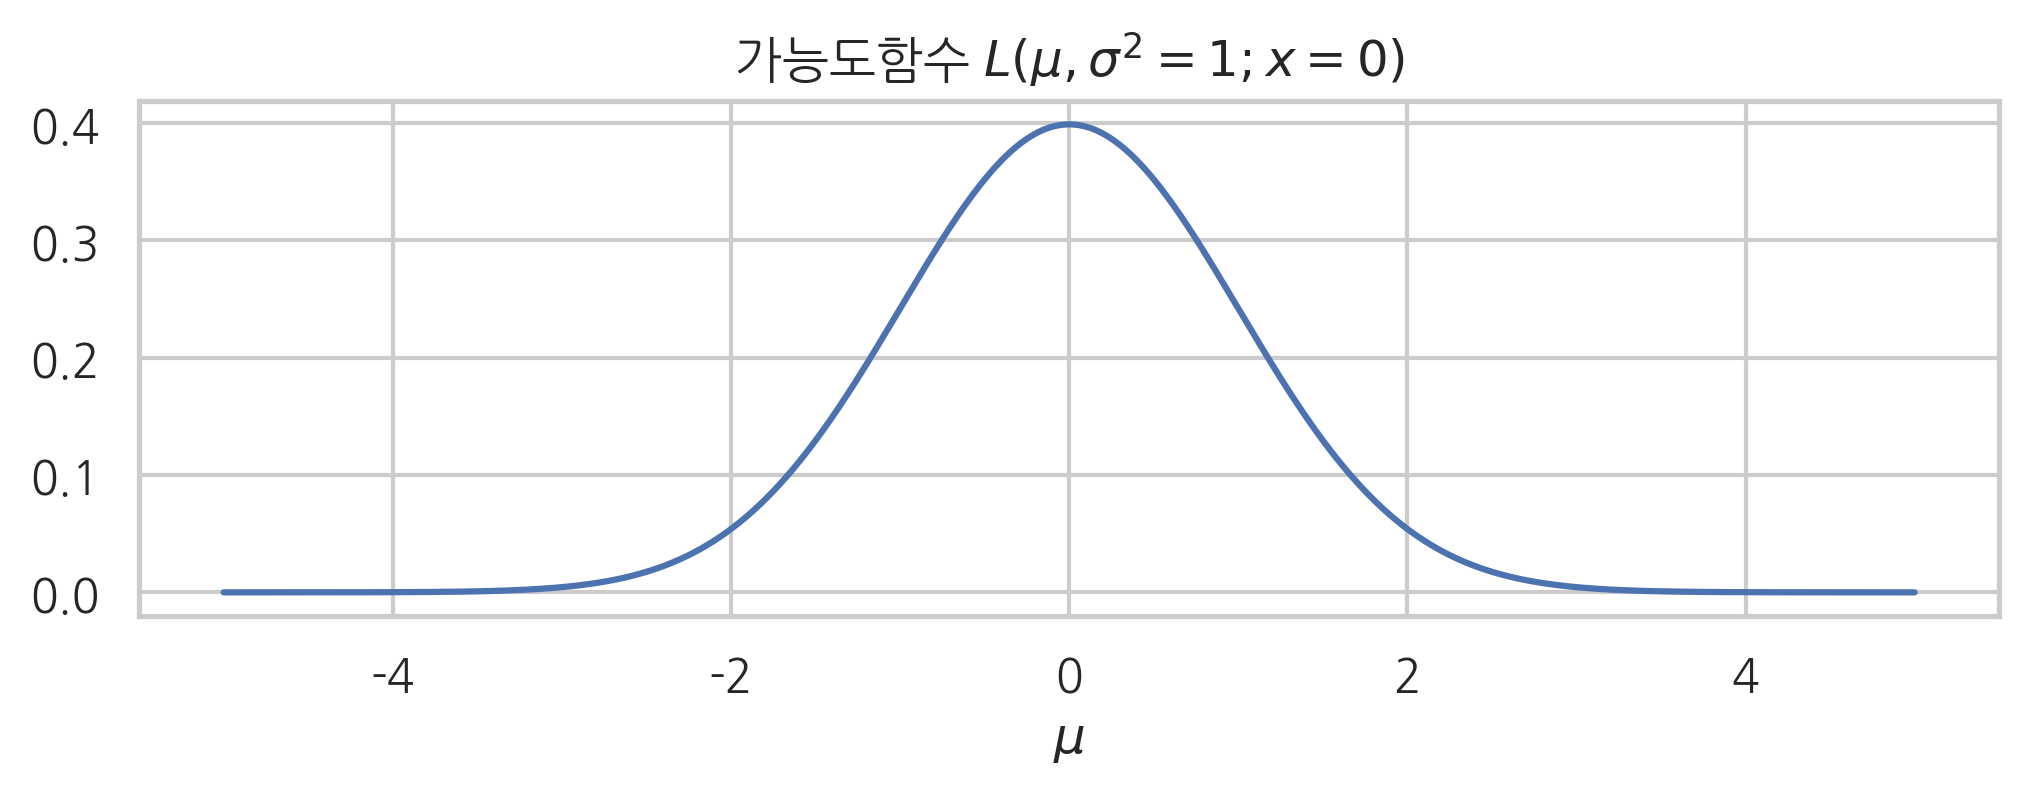

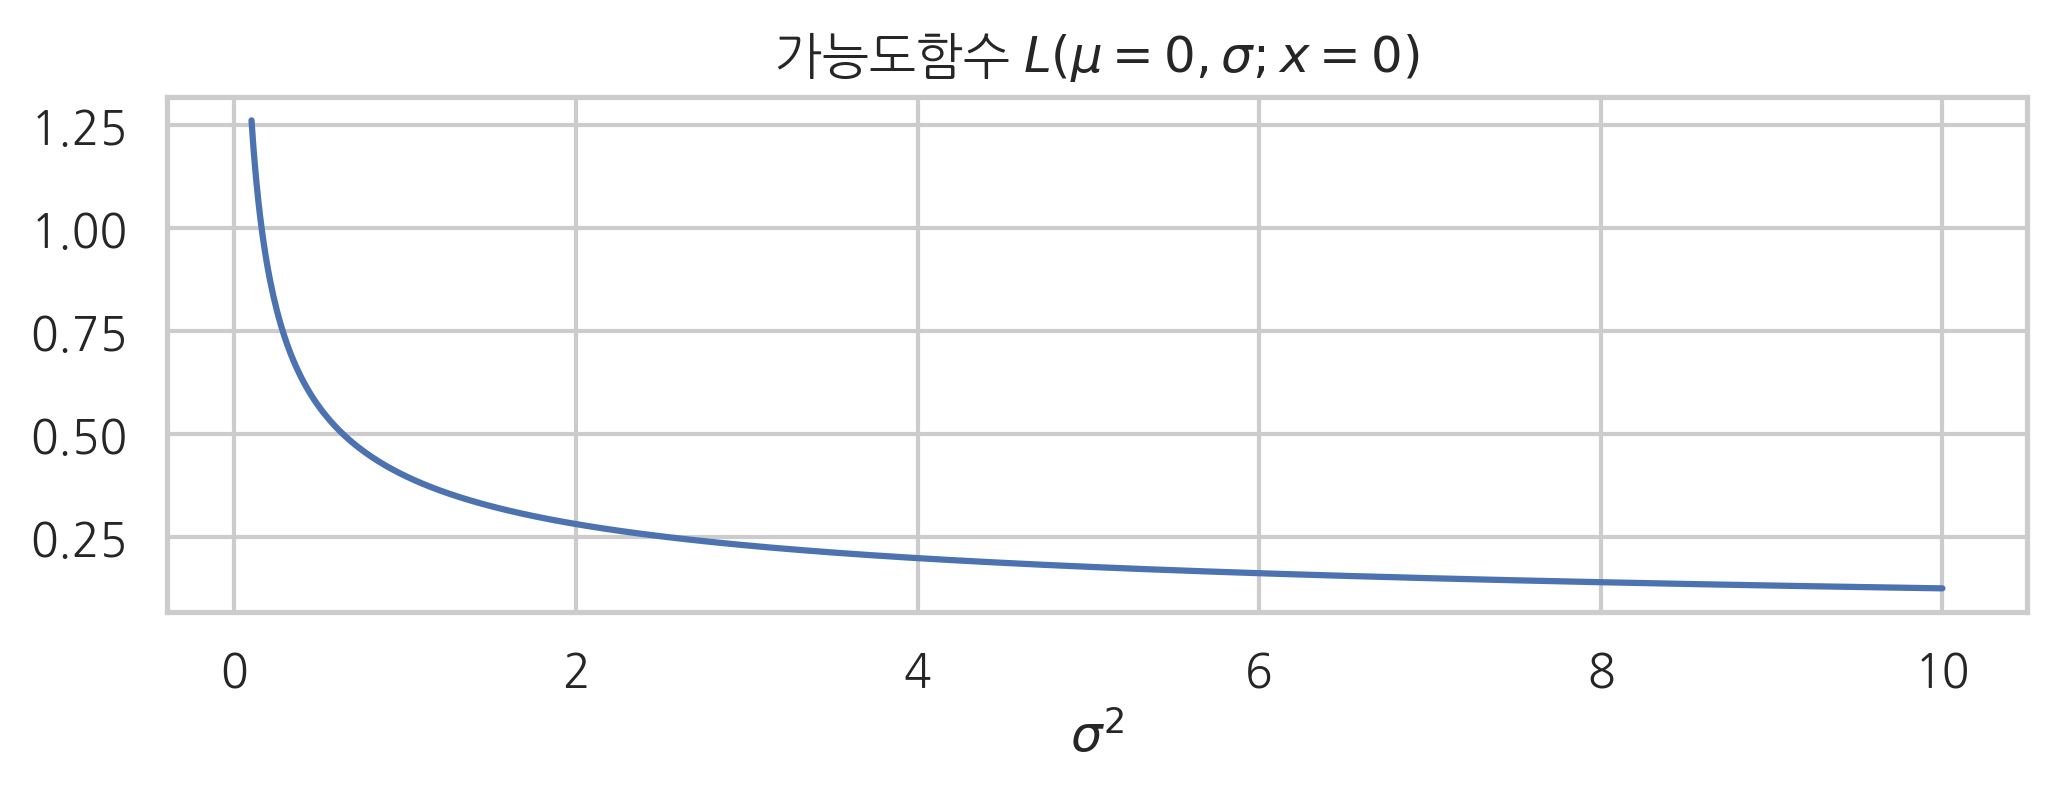

In [1]:
def likelihood_mu(mu):
    return sp.stats.norm(loc=mu).pdf(0)

mus = np.linspace(-5, 5, 1000)
likelihood_mu = [likelihood_mu(m) for m in mus]

plt.subplot(211)
plt.plot(mus, likelihood_mu)
plt.title("가능도함수 $L(\mu, \sigma^2=1; x=0)$")
plt.xlabel("$\mu$")
plt.show()

def likelihood_sigma2(sigma2):
    return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

plt.subplot(212)
plt.plot(sigma2s, likelihood_sigma2)
plt.title("가능도함수 $L(\mu=0, \sigma; x=0)$")
plt.xlabel("$\sigma^2$")
plt.show()

$L(\mu,\sigma2)$은 이차원 함수이므로 입체로 그리면 다음과 같다.

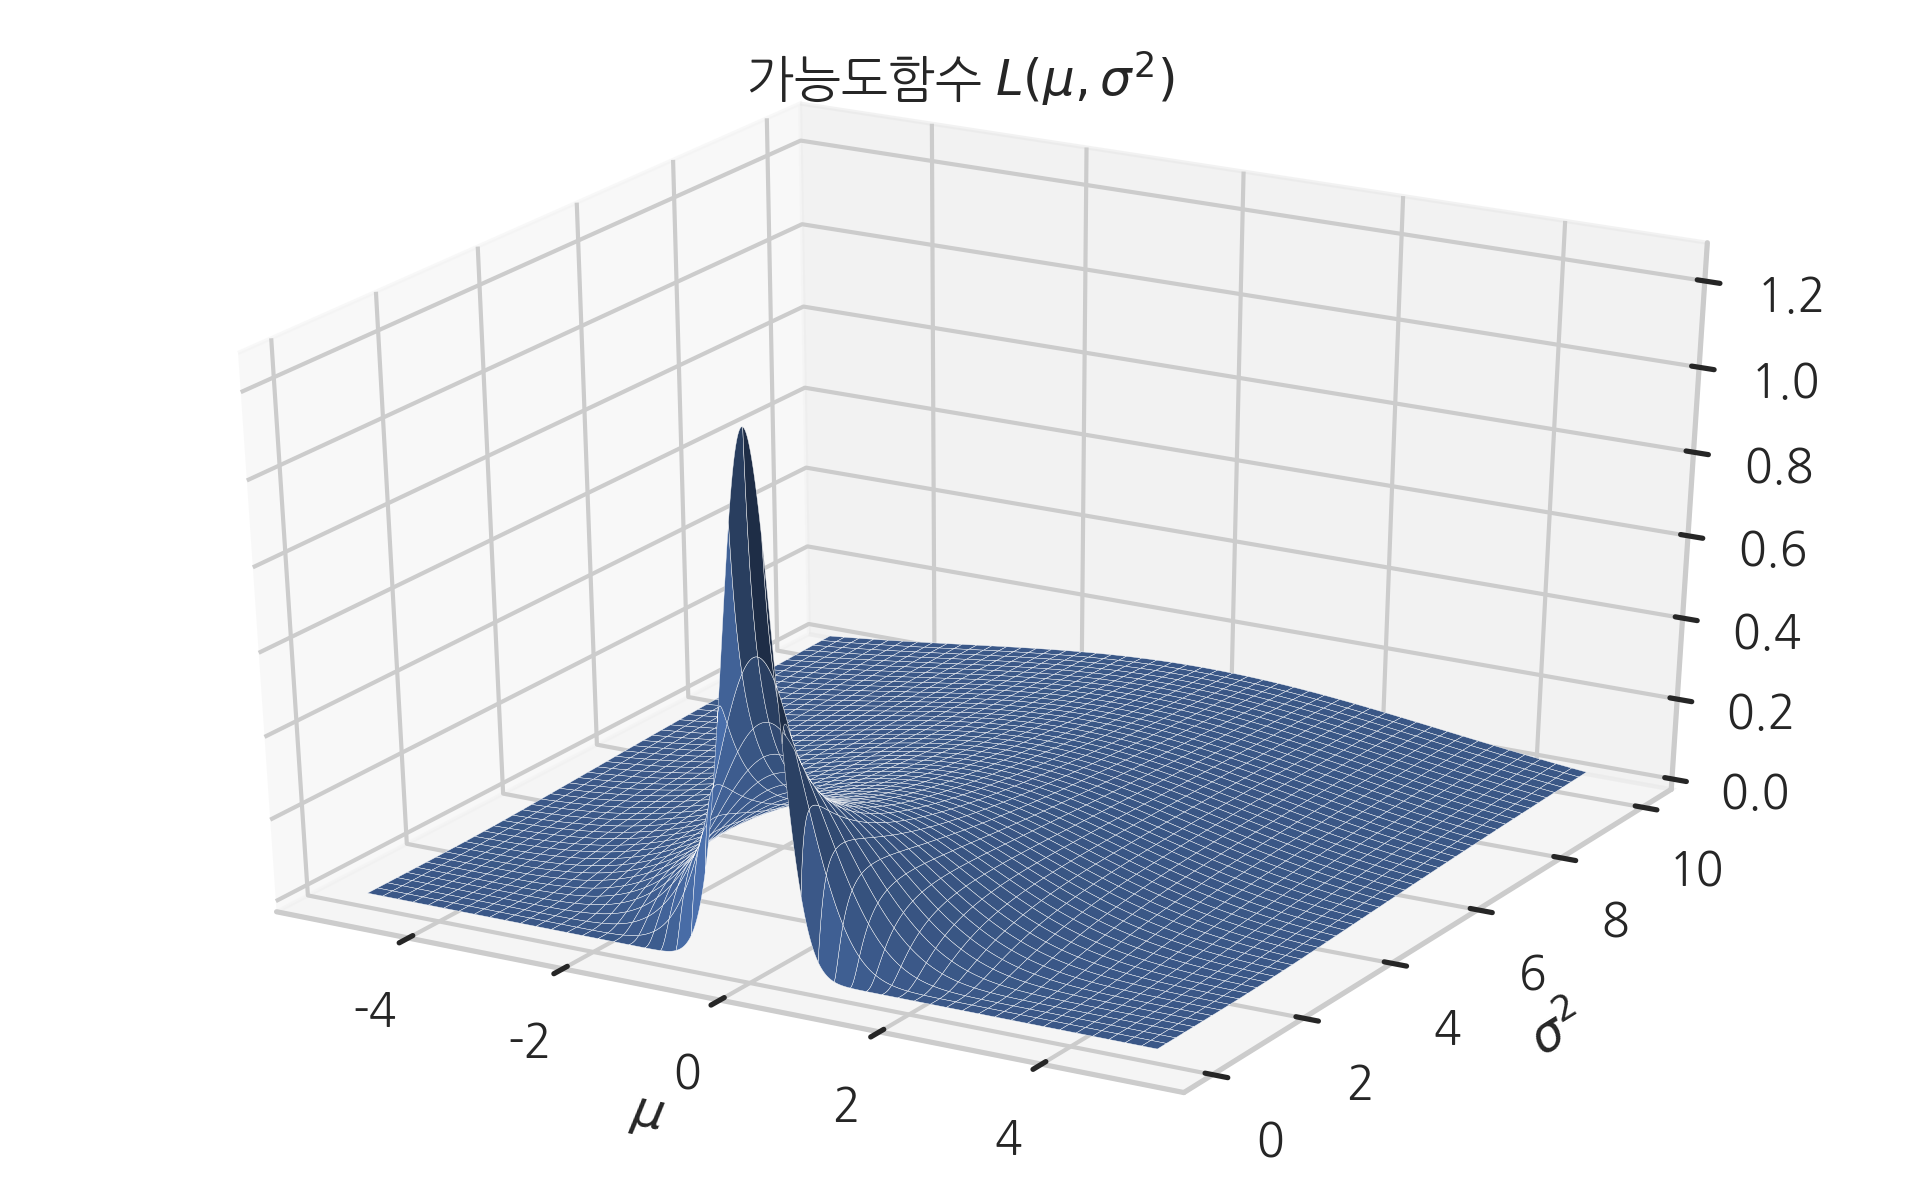

In [2]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU ** 2 / (2 * SIGMA2)) / np.sqrt(2 * np.pi * SIGMA2)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(MU, SIGMA2, L, linewidth=0.1)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title('가능도함수 $L(\mu, \sigma^2)$')
plt.show()

#### 예제

베르누이분포의 확률질량함수는 다음과 같은 함수다. 이때 입력 $x$는 0과 1이라는 두 가지 값만 받을 수 있다. 

$$
\begin{align}
p(x; \mu_0) = \mu_0^x (1-\mu_0)^{1-x}
\tag{9.2.8}
\end{align}
$$

하지만 가능도함수는 다음과 0부터 1까지의 연속적인 실숫값을 입력으로 받는 함수가 된다.

$$
\begin{align}
L(\mu; x_0) = \mu^{x_0} (1-\mu)^{1-x_0}
\tag{9.2.9}
\end{align}
$$

수식은 같지만 함수의 변수가 다르다는 점에 주의하라.

가능도함수를 수식으로 나타내면 수식 자체는 확률밀도함수의 수식과 같다. 하지만 가능도함수는 확률분포함수가 아니라는 점에 주의해야 한다. 확률밀도함수는 가능한 모든 표본값 $x$에 대해 적분하면 전체 면적이 1이 되지만,

$$
\begin{align}
\int_{-\infty}^{\infty} p(x; \theta) dx = 1
\tag{9.2.10}
\end{align}
$$

가능도함수는 가능한 모든 모숫값 $\theta$에 대해 적분했을 때 1이 된다는 보장이 없다.

$$
\begin{align}
\int_{-\infty}^{\infty} {L}(\theta;x) d\theta =  \int_{-\infty}^{\infty} p(x; \theta) d\theta \neq 1
\tag{9.2.11}
\end{align}
$$


* 확률밀도함수 $f(x; \theta) $
    * $\theta$ 값을 이미 알고 있음
    * $\theta$는 상수, $x$는 변수
    * $\theta$가 이미 정해져 있는 상황에서의 $x$ 값의 상대적 확률
    * 적분하면 전체 면적은 항상 1


* 가능도함수 $L(\theta) = p(x|\theta)$
    * $x$가 이미 발생. 값을 이미 알고 있음
    * $x$는 상수, $\theta$는 변수
    * $x$가 이미 정해져 있는 상황에서의 $\theta$ 값의 상대적 확률
    * 적분하면 전체 면적이 1이 아닐 수 있다.



### 최대가능도 추정법

최대가능도 추정법(Maximum Likelihood Estimation, MLE)은 주어진 표본에 대해 가능도를 가장 크게 하는 모수 $\theta$를 찾는 방법이다. 이 방법으로 찾은 모수는 기호로 $\hat\theta_{\text{MLE}}$와 같이 표시한다.

$$
\begin{align}
\hat\theta_{\text{MLE}} = \arg \max_{\theta} L(\theta; x)
\tag{9.2.12}
\end{align}
$$


#### 예제

정규분포를 가지는 확률변수의 분산 $\sigma^2=1$은 알고 있으나 평균 $\mu$를 모르고 있어 이를 추정해야 하는 문제를 생각해보자.
확률변수의 표본은  하나 $x_1=1$를 가지고 있다고 하자. 
이 경우 어떤 $\mu$ 값이 가장 가능성(가능도)이 커 보이는가? 다음 그림에는 $\mu=-1$, $\mu=0$, $\mu=1$, 세 가지 후보를 제시한다. 이 세 가지 $\mu$ 값에 대해 $1$이 나올 확률밀도의 값이 바로 가능도다. 

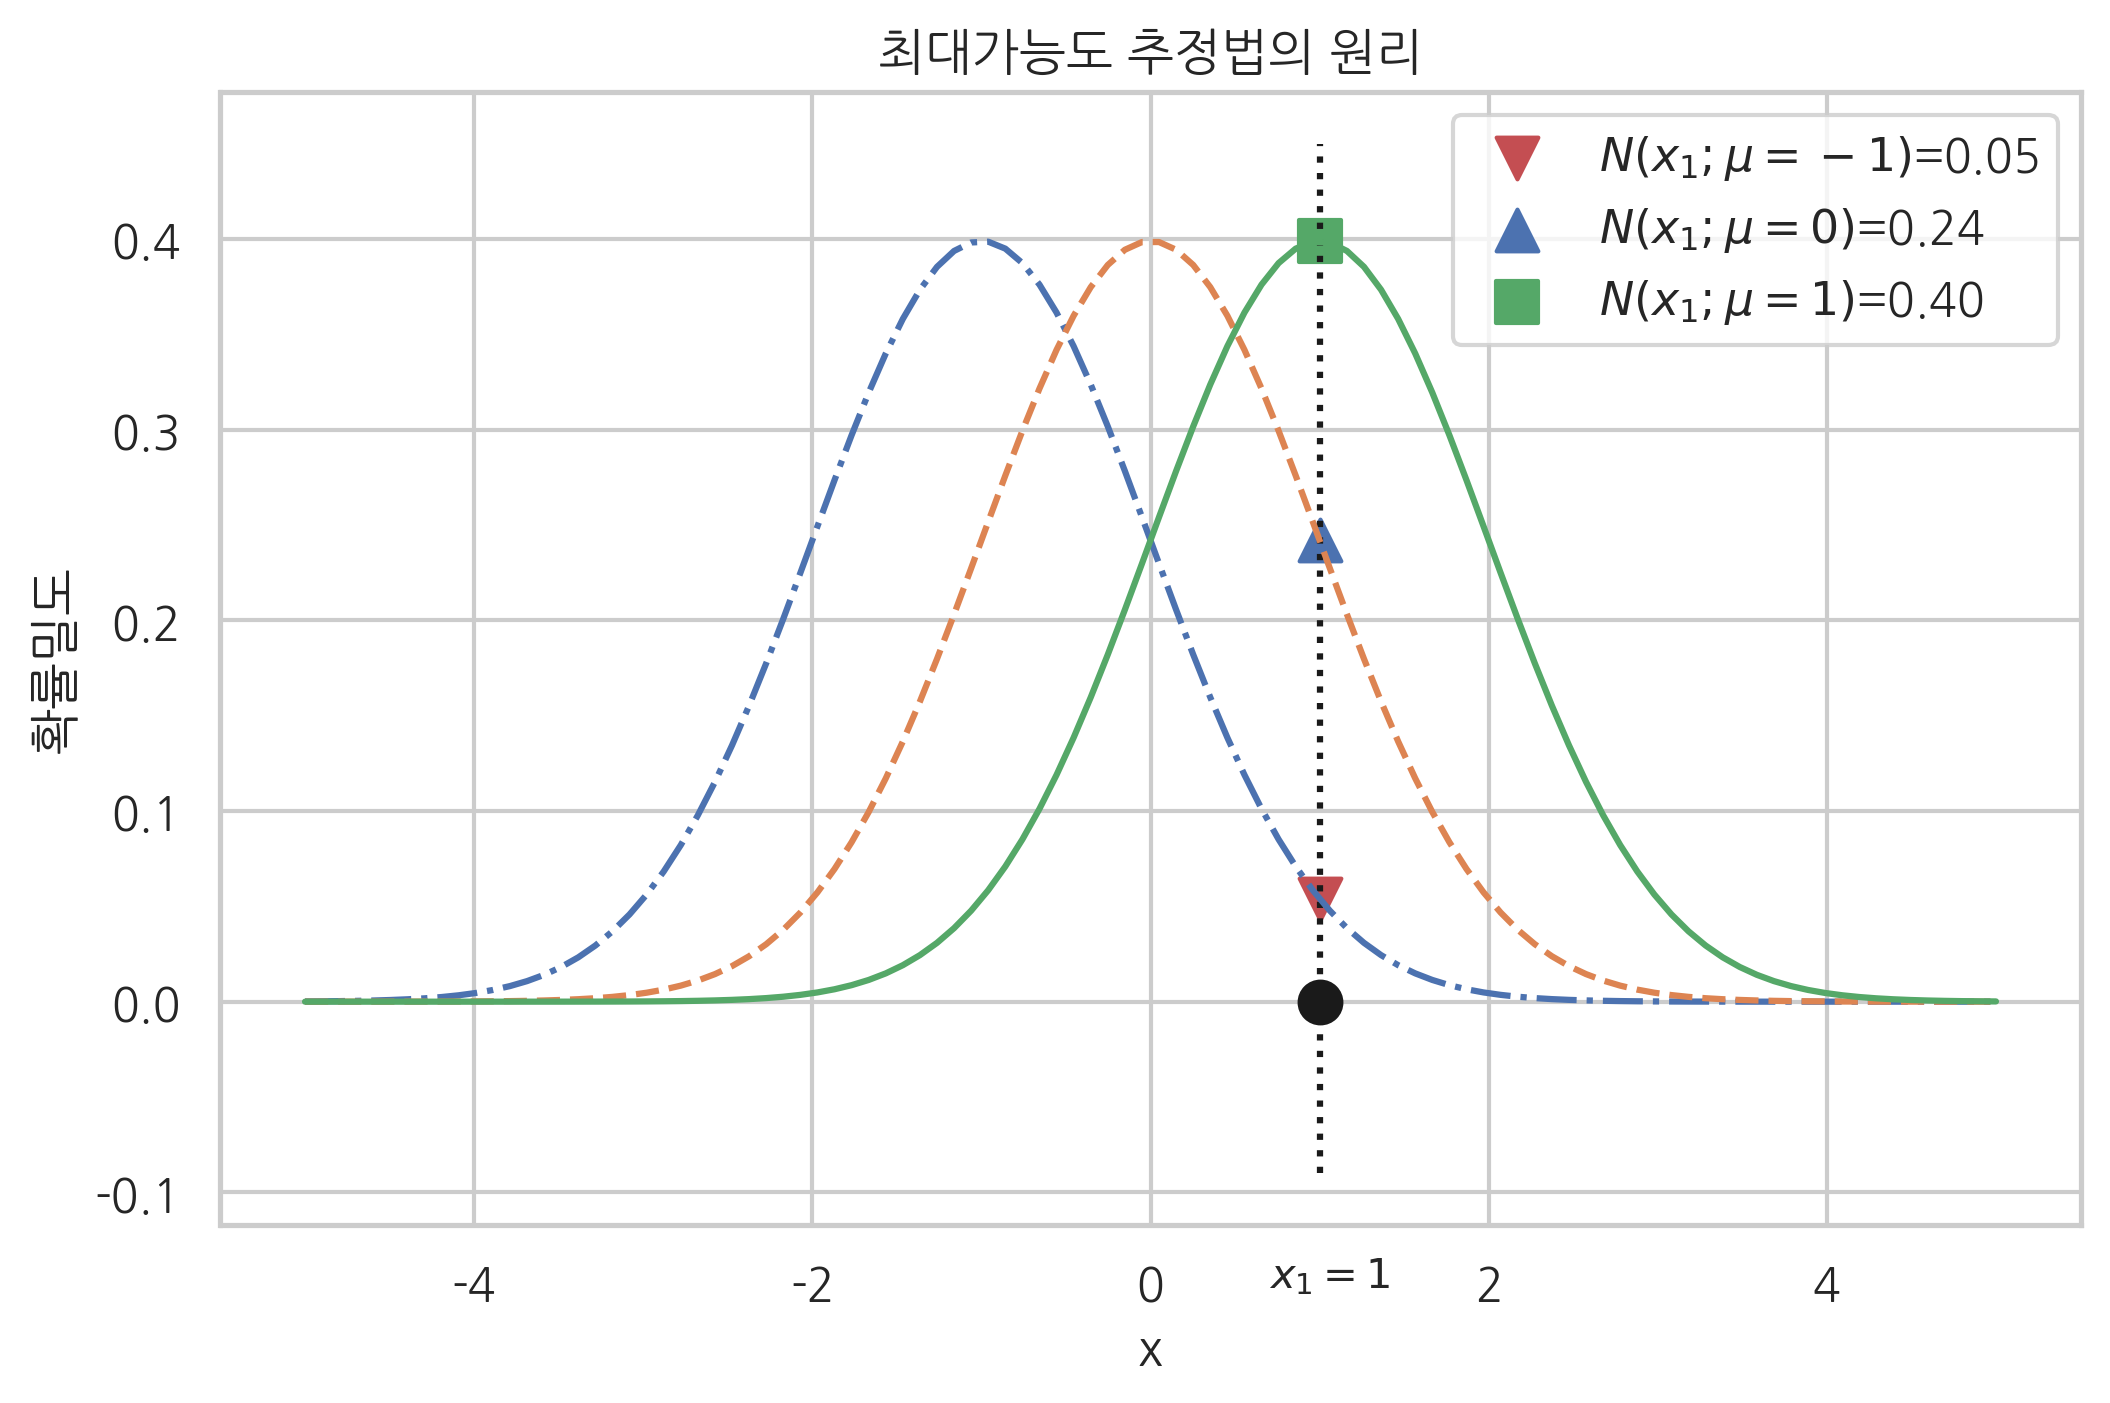

In [3]:
x = np.linspace(-5, 5, 100)

p1 = sp.stats.norm(loc=-1).pdf(1)
p2 = sp.stats.norm(loc=0).pdf(1)
p3 = sp.stats.norm(loc=1).pdf(1)

plt.scatter(1, p1, s=100, c='r', marker='v', 
         label=r"$N(x_1;\mu=-1)$={:.2f}".format(np.round(p1, 2)))
plt.scatter(1, p2, s=100, c='b', marker='^', 
         label=r"$N(x_1;\mu=0)$={:.2f}".format(np.round(p2, 2)))
plt.scatter(1, p3, s=100, c='g', marker='s', 
         label=r"$N(x_1;\mu=1)$={:.2f}".format(np.round(p3, 2)))

plt.plot(x, sp.stats.norm(loc=-1).pdf(x), ls="-.")
plt.plot(x, sp.stats.norm(loc=0).pdf(x), ls="--")
plt.plot(x, sp.stats.norm(loc=1).pdf(x), ls="-")
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("확률밀도")
plt.legend()
plt.title("최대가능도 추정법의 원리")
plt.show()


* $N(x; \mu=-1)$이라는 확률분포에서 $x=1$이 나올 가능도(확률밀도)는 0.05이다.
* $N(x; \mu=0)$이라는 확률분포에서 $x=1$이 나올 가능도(확률밀도)는 0.24이다.
* $N(x; \mu=1)$이라는 확률분포에서 $x=1$이 나올 가능도(확률밀도)는 0.40이다.

어떤 확률분포를 고르는 것이 합리적인가? 당연히 가장 큰 가능도를 가진 확률분포를 선택해야 한다.
그림에서 볼 수 있듯이 $\mu=1$일 경우의 가능도가 가장 크다. 
따라서 최대가능도 추정법에 의한 추정값은 $\hat\mu_{\text{MLE}}=1$이다.

### 복수의 표본 데이터가 있는 경우의 가능도함수

일반적으로는 추정을 위해 확보하고 있는 확률변수 표본의 수가 하나가 아니라 복수 개 $\{ x_1, x_2, \cdots x_N \}$이므로 가능도함수도 복수 표본값에 대한 결합확률밀도 $p_{X_1 X_2 \cdots X_N}(x_1, x_2, \cdots, x_N ; \theta)$가 된다. 표본 데이터 $x_1, x_2, \cdots x_N$는 같은 확률분포에서 나온 독립적인 값들이므로 결합 확률밀도함수는 다음처럼 곱으로 표현된다.

$$
\begin{align}
L(\theta; x_1, \ldots, x_N) 
= p(x_1, \ldots, x_N; \theta)
= \prod_{i=1}^N p(x_i; \theta)
\tag{9.2.13}
\end{align}
$$

#### 예제

정규분포로부터 다음 세 개의 표본 데이터를 얻었다.

$$
\begin{align}
\{ 1, 0, -3 \}
\tag{9.2.14}
\end{align}
$$

이 경우의 가능도함수는 다음과 같다.

$$
\begin{align}
\begin{aligned} 
&L(\theta; x_1, x_2, x_3) \\ &= 
\mathcal{N}(x_1, x_2, x_3;\theta)  \\
&=
\mathcal{N}(x_1;\theta) \cdot \mathcal{N}(x_2;\theta) \cdot \mathcal{N}(x_3;\theta) \\
&=
\dfrac{1}{\sqrt{2\pi\sigma^2}} \exp\left({-\frac{(1-\mu)^2}{2\sigma^2}}\right) \cdot
\dfrac{1}{\sqrt{2\pi\sigma^2}} \exp\left({-\frac{(0-\mu)^2}{2\sigma^2}}\right) \cdot
\\
&\;\;\;\; \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp\left({-\frac{(-3-\mu)^2}{2\sigma^2}}\right) \\
&=
\dfrac{1}{(2\pi\sigma^2)^{\frac{3}{2}}} 
\exp\left({-\frac{\mu^2 + (1-\mu)^2 + (-3-\mu)^2}{2\sigma^2}}\right) \\
&=
\dfrac{1}{(2\pi\sigma^2)^{\frac{3}{2}}} 
\exp\left({-\frac{3\mu^2+4\mu+10}{2\sigma^2}}\right) \cdot \\
&=
\dfrac{1}{(2\pi\sigma^2)^{\frac{3}{2}}} 
\exp\left({-\frac{3(\mu+\frac23)^2+\frac{26}3}{2\sigma^2}}\right) \cdot
\end{aligned}
\tag{9.2.15}
\end{align}
$$

이 가능도함수는 2차함수이므로 미분을 하지 않아도 최대값 위치를 구할 수 있다. 가장 가능도를 높게하는 모수 $\mu$의 값은 $\hat{\mu}_{\text{MLE}}=-\frac23$이다.

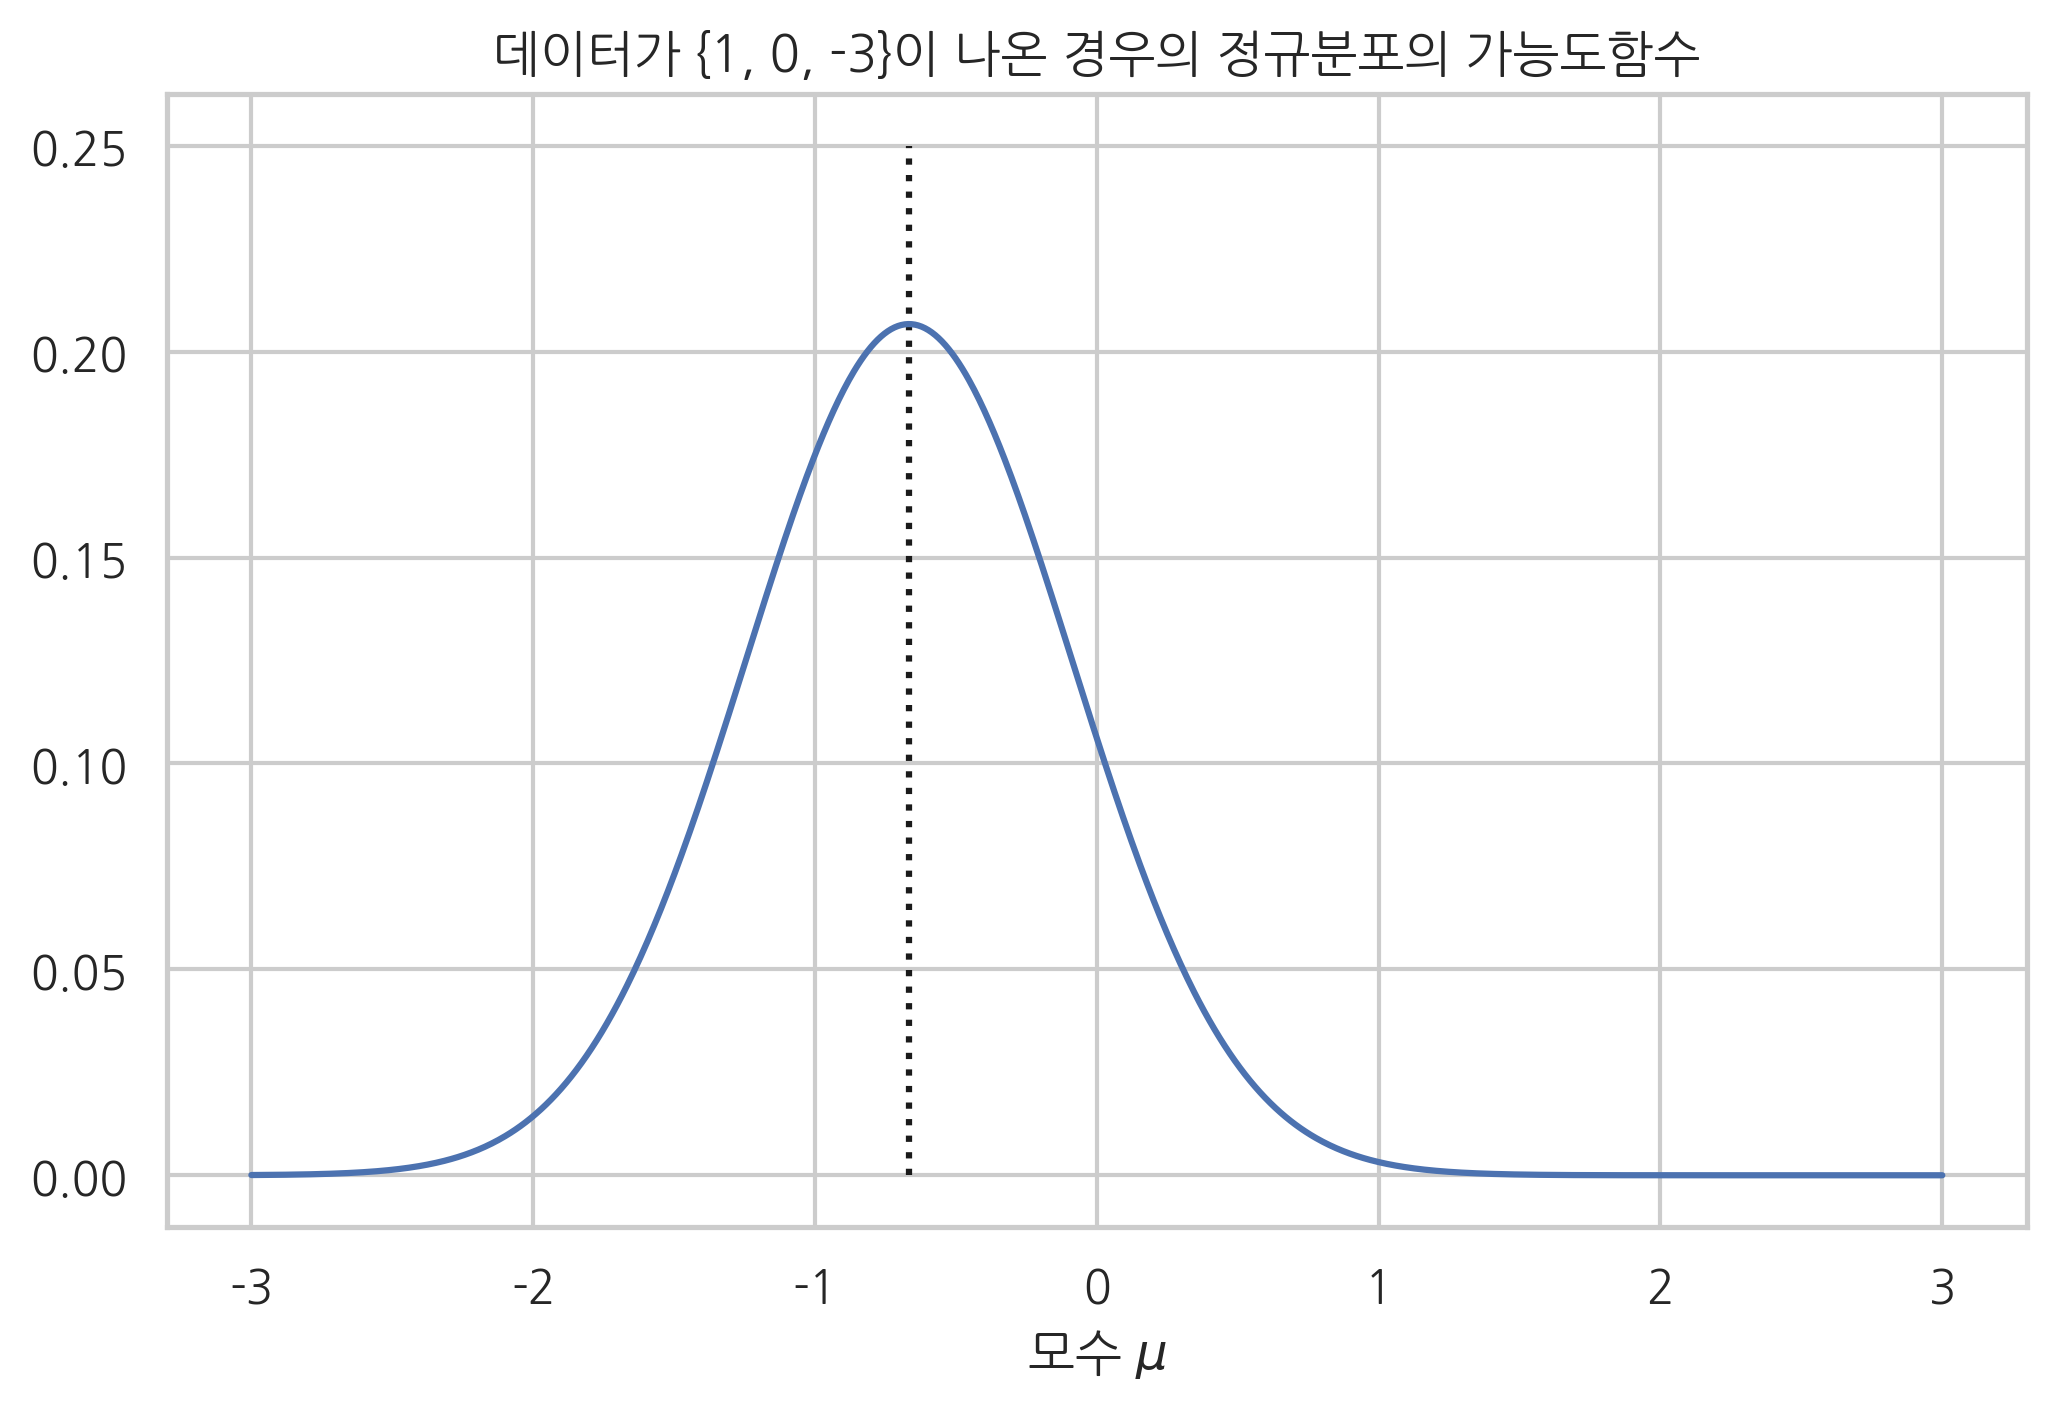

In [4]:
mu = np.linspace(-3, 3, 1000)
sigma2 = 1

def likelihood(mu):
    return (2 * np.pi * sigma2) ** (3 / 2) * np.exp(-(3 * mu ** 2 + 4 * mu + 10) / (2 * sigma2))

li = likelihood(mu)

plt.plot(mu, li)
plt.vlines(-2/3, 0, 0.25, linestyles=":")
plt.xlabel(r"모수 $\mu$")
plt.title("데이터가 {1, 0, -3}이 나온 경우의 정규분포의 가능도함수")
plt.show()

#### 예제

베르누이분포로부터 다음 표본 데이터를 얻었다고 하자.

$$
\begin{align}
\{ 1, 0, 1 \}
\tag{9.2.16}
\end{align}
$$

이때 가능도함수는 다음과 같다.

$$
\begin{align}
\begin{aligned}
&L(\mu; x_1=1, x_2=0, x_3=1) \\
&= p(x_1=1, x_2=0, x_3=1; \mu) \\
&= p(x=1;\mu)p(x=0;\mu)p(x=1;\mu) \\
&= \mu^1 (1-\mu)^{1-1} \cdot \mu^0 (1-\mu)^{1-0} \cdot \mu^1 (1-\mu)^{1-1} \\
&= \mu \cdot (1-\mu) \cdot \mu \\
&= -\mu^3 + \mu^2
\end{aligned}
\tag{9.2.17}
\end{align}
$$

이 가능도함수를 최대화하는 모수의 값을 찾기 위해 미분한 도함수가 0이 되는 위치를 찾는다. 

$$
\begin{align}
\dfrac{dL}{d\mu} = -3\mu^2 + 2\mu = -3\mu\left(\mu - \dfrac{2}{3}\right) = 0 
\tag{9.2.18}
\end{align}
$$


모수의 값이 0이면 표본값으로 1이 나올 수 없으므로 가능도함수를 최대화하는 모수는 $\hat\mu_{\text{MLE}}=\frac{2}{3}$다.


### 로그가능도함수

일반적으로 최대가능도 추정법을 사용하여 가능도가 최대가 되는 $\theta$를 계산해려면 수치적 최적화(numerical optimization)를 해야 한다.

$$
\begin{align}
\hat\theta_{\text{ML}} = \arg \max_{\theta} L(\theta; \{x_i\})
\tag{9.2.19}
\end{align}
$$

그런데 보통은 가능도를 직접 사용하는 것이 아니라 로그 변환한 로그가능도함수 ${LL} = \log{{L}}$를 사용하는 경우가 많다.

$$
\begin{align}
\hat\theta_{\text{ML}} = \arg \max_{\theta} \log{L}(\theta; \{x_i\})
\tag{9.2.20}
\end{align}
$$

이유는 다음과 같다.

1. 로그 변환에 의해서는 최대값의 위치가 변치 않는다.
1. 반복시행으로 인한 복수 표본 데이터인 경우 결합 확률밀도함수가 동일한 함수의 곱으로 나타나는 경우가 많은데 이때 로그 변환에 의해 곱셈이 덧셈이 되어 계산이 단순해진다.

#### 예제

위 예와 같이 정규분포로 부터 얻은 표본값이 다음과 같은 경우

$$
\begin{align}
\{ 1, 0, -3 \}
\tag{9.2.21}
\end{align}
$$

로그 변환을 하면 최대값의 위치가 $-2/3$라는 것을 쉽게 구할 수 있다.

$$
\begin{align}
\begin{aligned}
&\log L(\mu; x_1, x_2, x_3) \\
&= 
\log \left( \dfrac{1}{(2\pi\sigma^2)^{\frac{3}{2}}} \exp\left({-\frac{3\mu^2+4\mu+10}{2\sigma^2}}\right) \right) \\
&= 
\log \left( \dfrac{1}{(2\pi\sigma^2)^{\frac{3}{2}}} \right) -\frac{3\mu^2+4\mu+10}{2\sigma^2} \\
&= 
\log \left( \dfrac{1}{(2\pi\sigma^2)^{\frac{3}{2}}} \right) -\frac{3\left(\mu+\frac{2}{3}\right)^2+\frac{26}{3}}{2\sigma^2} \\
\end{aligned}
\tag{9.2.22}
\end{align}
$$

#### 연습 문제 9.2.1

베르누이분포로부터 다음과 같은 표본을 얻었다. 이 확률변수의 모수 $\mu$를 최대가능도 추정법을 사용하여 구하라.

$$
\begin{align}
\{ 1, 0, 1, 1 \}
\tag{9.2.23}
\end{align}
$$

#### 연습 문제 9.2.2

$K=4$인 카테고리분포로부터 다음과 같은 표본을 얻었다. 이 확률변수의 모수 $\mu$를 최대가능도 추정법을 사용하여 구하라.

$$
\begin{align}
\{ 1, 4, 1, 2, 4, 2, 3, 4 \}
\tag{9.2.24}
\end{align}
$$

데이터의 개수가 $N$개인 일반적인 경우에 대해 베르누이분포, 카테고리분포, 정규분포, 다변수정규분포의 모수를 최대가능도 추정법으로 계산해보자.

### 베르누이분포의 최대가능도 모수 추정

모수가 $\mu$인 베르누이분포의 확률질량함수는 다음과 같다.

$$
\begin{align}
p(x ; \mu ) = \text{Bern}(x ; \mu ) = \mu^x (1 - \mu)^{1-x}
\tag{9.2.26}
\end{align}
$$

그런데  $N$ 번의 반복 시행으로 표본 데이터가 $x_1, \cdots, x_N$이 있는 경우에는 모두 독립이므로 전체 확률질량함수는 각각의 확률질량함수의 곱과 같다.

$$
\begin{align}
L(\mu ; x_1, \cdots, x_N) = p(x_1, \cdots, x_N;\mu) = \prod_{i=1}^N  \mu^{x_i} (1 - \mu)^{1-x_i}
\tag{9.2.27}
\end{align}
$$

미분을 쉽게 하기 위해 로그 변환을 하여 로그가능도를 구하면 다음과 같다. 

$$ 
\begin{align}
\begin{aligned}
\log L 
&= \log p(x_1, \cdots, x_N;\mu)  \\
&= \sum_{i=1}^N \big\{ {x_i} \log\mu + (1-x_i)\log(1 - \mu) \big\} \\
&=  \sum_{i=1}^N {x_i} \log\mu +  \left( N-\sum_{i=1}^N x_i \right) \log( 1 - \mu ) \\
\end{aligned}
\tag{9.2.28}
\end{align}
$$


$x = 1$(성공) 또는 $x= 0$ (실패) 이므로 성공 횟수와 실패 횟수를 다음과 같이 $N_1$, $N_0$라고 표기하도록 하자.

$$
\begin{align}
N_1 = \sum_{i=1}^N {x_i}, \;\;\; N_0 = N - \sum_{i=1}^N {x_i}
\tag{9.2.29}
\end{align}
$$
 
로그가능도는 다음과 같아진다.

$$ 
\begin{align}
\begin{aligned}
\log L 
&=  N_1 \log\mu  + N_0 \log(1 - \mu) \\
\end{aligned}
\tag{9.2.30}
\end{align}
$$

이 목적함수를 모수로 미분한 값이 0이 되게 하는 모숫값을 구하면 다음과 같다.

$$
\begin{align}
\begin{aligned}
\dfrac{\partial \log L}{\partial \mu} 
&= \dfrac{\partial}{\partial \mu} \big\{ N_1 \log\mu  + N_0 \log(1 - \mu)  \big\} = 0\\
&= \dfrac{N_1}{\mu}  - \dfrac{N_0}{1-\mu} = 0 \\
\end{aligned}
\tag{9.2.31}
\end{align}
$$


$$
\begin{align}
\dfrac{N_1}{\mu}  = \dfrac{N_0}{1-\mu}
\tag{9.2.32}
\end{align}
$$


$$
\begin{align}
\dfrac{1-\mu}{\mu} = \dfrac{N_0}{N_1} = \dfrac{N-N_1}{N_1} 
\tag{9.2.33}
\end{align}
$$


$$
\begin{align}
\dfrac{1}{\mu} - 1 = \dfrac{N}{N_1} - 1
\tag{9.2.34}
\end{align}
$$


$$
\begin{align}
\mu= \dfrac{N_1}{N}
\tag{9.2.35}
\end{align}
$$

결론은 다음과 같다.

> **최대가능도 추정법에 의한 베르누이분포의 모수는 1이 나온 횟수와 전체 시행횟수의 비율이다.**


### 카테고리분포의 최대가능도 모수 추정

모수가 $\mu = (\mu_1, \cdots, \mu_K)$인 카테고리분포의 확률질량함수는 다음과 같다.

$$
\begin{align}
p(x ; \mu_1, \cdots, \mu_K ) = \text{Cat}(x ; \mu_1, \cdots, \mu_K) = \prod_{k=1}^K \mu_k^{x_k}
\tag{9.2.36}
\end{align}
$$

$$
\begin{align}
\sum_{k=1}^K \mu_k = 1
\tag{9.2.37}
\end{align}
$$

이 식에서 $x$는 모두 $k$개의 원소를 가지는 원핫인코딩(one-hot-encoding)벡터다. 그런데  $N$ 번의 반복 시행으로 표본 데이터가 $x_1, \cdots, x_N$이 있는 경우에는 모두 독립이므로 전체 확률밀도함수는 각각의 확률질량함수의 곱과 같다.

$$
\begin{align}
L(\mu_1, \cdots, \mu_K ; x_1,\cdots, x_N) = \prod_{i=1}^N \prod_{k=1}^K \mu_k^{x_{i,k}}
\tag{9.2.38}
\end{align}
$$

위 식에서 $x_{i,k}$는 $i$번째 시행 결과인 $x_i$의 $k$번째 원소를 뜻한다.

미분을 쉽게 하기 위해 로그 변환을 한 로그가능도를 구하면 다음과 같다. 

$$ 
\begin{align}
\begin{aligned}
\log L 
&= \log p(x_1, \cdots, x_N;\mu_1, \cdots, \mu_K)  \\
&= \sum_{i=1}^N \sum_{k=1}^K  \left( {x_{i,k}} \log\mu_k  \right) \\
&= \sum_{k=1}^K  \sum_{i=1}^N  \left(  \log\mu_k \cdot {x_{i,k}}\right) \\
&= \sum_{k=1}^K \left( \log\mu_k \left( \sum_{i=1}^N {x_{i,k}}   \right)  \right)
\end{aligned}
\tag{9.2.39}
\end{align}
$$


$k$번째 원소가 나온 횟수를 $N_k$라고 표기하자.

$$
\begin{align}
N_k = \sum_{i=1}^N {x_{i,k}}
\tag{9.2.40}
\end{align}
$$

그러면 로그가능도가 다음과 같아지며 이 함수를 최대화하는 모수의 값을 찾아야 한다.

$$ 
\begin{align}
\begin{aligned}
\log L 
&= \sum_{k=1}^K \left( \log\mu_k  \cdot N_k  \right)
\end{aligned}
\tag{9.2.41}
\end{align}
$$

그런데 모수는 다음과 같은 제한조건을 만족해야만 한다.

$$
\begin{align}
\sum_{k=1}^K \mu_k = 1
\tag{9.2.37}
\end{align}
$$

따라서 라그랑주 승수법을 사용하여 로그가능도에 제한조건을 추가한 새로운 목적함수를 생각할 수 있다.

$$
\begin{align}
J = \sum_{k=1}^K \log\mu_k N_k  + \lambda \left(1- \sum_{k=1}^K \mu_k \right)
\tag{9.2.43}
\end{align}
$$

이 목적함수를 모수로 미분한 값이 0이 되는 값을 구하면 된다.

$$
\begin{align}
\begin{aligned}
\dfrac{\partial J}{\partial \mu_k} 
&= \dfrac{\partial}{\partial \mu_k} \left\{ \sum_{k=1}^K \log\mu_k N_k  + \lambda \left(1- \sum_{k=1}^K \mu_k\right)  \right\} = 0  \;\; (k=1, \cdots, K) \\
\dfrac{\partial J}{\partial \lambda} 
&= \dfrac{\partial}{\partial \lambda} \left\{ \sum_{k=1}^K \log\mu_k N_k  + \lambda \left(1- \sum_{k=1}^K \mu_k \right)  \right\} = 0 & \\
\end{aligned}
\tag{9.2.44}
\end{align}
$$

이를 풀면 다음과 같이 모수를 추정할 수 있다.

$$
\begin{align}
\dfrac{N_1}{\mu_1}  = \dfrac{N_2}{\mu_2} = \cdots = \dfrac{N_K}{\mu_K} = \lambda
\tag{9.2.45}
\end{align}
$$

$$
\begin{align}
N_k = \lambda \mu_k
\tag{9.2.46}
\end{align}
$$


$$
\begin{align}
\sum_{k=1}^K N_k = \lambda \sum_{k=1}^K \mu_k  = \lambda = N
\tag{9.2.47}
\end{align}
$$

$$
\begin{align}
\mu_k = \dfrac{N_k}{N}
\tag{9.2.48}
\end{align}
$$

결론은 다음과 같다.

> **최대가능도 추정법에 의한 카테고리분포의 모수는 각 범주값이 나온 횟수와 전체 시행횟수의 비율이다.**


### 정규분포의 최대가능도 모수 추정


정규분포의 확률밀도함수는 다음과 같다. 여기에서 $x$는 스칼라 값이다.

$$
\begin{align}
p(x ; \theta ) = \mathcal{N}(x ; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\tag{9.2.49}
\end{align}
$$

그런데  $N$ 번의 반복 시행으로 표본 데이터가  $x_1, \cdots, x_N$이 있는 경우에는 모두 독립이므로 전체 확률밀도함수는 각각의 확률밀도함수의 곱과 같다.

$$
\begin{align}
L(\mu;x_1, \cdots, x_N) = p(x_1, \cdots, x_N;\mu) = \prod_{i=1}^N  \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_i-\mu)^2}{2\sigma^2}\right)
\tag{9.2.50}
\end{align}
$$

미분을 쉽게 하기 위해 로그 변환을 한 로그가능도를 구하면 다음과 같다. 여기에서 상수 부분은 모아서  $C$ 로 표기했다.

$$ 
\begin{align}
\begin{aligned}
\log L 
&= \log p(x_1, \cdots, x_N;\mu)  \\
&= \sum_{i=1}^N \left\{ -\dfrac{1}{2}\log(2\pi\sigma^2) - \dfrac{(x_i-\mu)^2}{2\sigma^2} \right\} \\
&= -\dfrac{N}{2} \log(2\pi\sigma^2) - \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2
\end{aligned}
\tag{9.2.51}
\end{align}
$$

이 확률밀도함수가 최대가 되는 모숫값을 찾기 위해서는 각각의 모수로 미분한 값이 0이 되어야 한다.

$$
\begin{align}
\begin{aligned}
\dfrac{\partial \log L}{\partial \mu} 
&= \dfrac{\partial}{\partial \mu} \left\{ \dfrac{N}{2} \log(2\pi\sigma^2) + \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2  \right\} = 0 \\
\dfrac{\partial \log L}{\partial \sigma^2} 
&= \dfrac{\partial}{\partial \sigma^2} \left\{ \dfrac{N}{2} \log(2\pi\sigma^2) + \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2 \right\} = 0\\
\end{aligned}
\tag{9.2.52}
\end{align}
$$

이 두 식을 풀면 주어진 데이터 표본에 대해 모수의 가능도를 가장 크게 하는 모수의 값을 구할 수 있다.
먼저 $\mu$에 대한 미분을 정리하면 다음과 같다.

$$
\begin{align}
\dfrac{\partial \log L}{\partial \mu}  = \dfrac{2}{2\sigma^2}\sum_{i=1}^N (x_i-\mu) = 0
\tag{9.2.53}
\end{align}
$$

$$
\begin{align}
N \mu = \sum_{i=1}^N x_i
\tag{9.2.54}
\end{align}
$$

$$
\begin{align}
\mu = \dfrac{1}{N}\sum_{i=1}^N x_i = \bar{x}
\tag{9.2.55}
\end{align}
$$

다음으로 $\sigma^2$에 대한 미분을 정리하면 다음과 같다.

$$
\begin{align}
\dfrac{\partial \log L}{\partial \sigma^2}  = \dfrac{N}{2\sigma^2} -  \dfrac{1}{2(\sigma^2)^2}\sum_{i=1}^N (x_i-\mu)^2  = 0
\tag{9.2.56}
\end{align}
$$


$$
\begin{align}
\sigma^2  =  \dfrac{1}{N}\sum_{i=1}^N (x_i-\mu)^2 = \dfrac{1}{N}\sum_{i=1}^N (x_i-\bar{x})^2 = s^2
\tag{9.2.57}
\end{align}
$$


결론은 다음과 같다.

> **최대가능도 추정법에 의한 정규분포의 기댓값은 표본평균과 같고 분산은 (편향)표본분산과 같다.**


### 다변수정규분포의 최대가능도 모수 추정

다변수정규분포의 확률밀도함수는 다음과 같다. 여기에서 $x$는 $M$차원 벡터이고 기댓값도 $M$차원 벡터, 공분산 행렬은 $M \times M$ 행렬이다.
지금까지와 마찬가지로 공분산 행렬 $\Sigma$가 양의 정부호(positive definite)라고 가정한다. 따라서 정밀도 행렬 $\Sigma^{-1} = \Lambda$가 존재할 수 있다.

$$
\begin{align}
p(x ; \theta ) = \mathcal{N}(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{M/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)
\tag{9.2.58}
\end{align}
$$

그런데 $N$번의 반복 시행으로 표본 데이터가 $x_1, \cdots, x_N$이 있는 경우에는 모두 독립이므로 전체 확률밀도함수는 각각의 확률밀도함수의 곱과 같다.

$$
\begin{align}
L(\mu;x_1, \cdots, x_N) = \prod_{i=1}^N  \dfrac{1}{(2\pi)^{M/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x_i-\mu)^T \Sigma^{-1} (x_i-\mu) \right)
\tag{9.2.59}
\end{align}
$$

미분을 쉽게 하기 위해 로그 변환을 한 로그가능도를 구하면 다음과 같다. 여기에서 상수 부분은 모아서 $C$로 표기했다.

$$ 
\begin{align}
\begin{aligned}
\log L 
&= \log p(x_1, \cdots, x_N;\mu)  \\
&= \sum_{i=1}^N \left\{ -\log((2\pi)^{M/2} |\Sigma|^{1/2}) - \dfrac{1}{2} (x_i-\mu)^T \Sigma^{-1} (x_i-\mu) \right\} \\
&= C -\dfrac{N}{2} \log|\Sigma| - \dfrac{1}{2} \sum_i^N (x_i-\mu)^T \Sigma^{-1} (x_i-\mu) 
\end{aligned}
\tag{9.2.60}
\end{align}
$$

여기에서 기호를 단순하게 하기 위해 정밀도 행렬 $\Sigma^{-1}$를 $\Lambda$로 표시하자. 

 $$
\begin{align}
\Lambda = \Sigma^{-1}
\tag{9.2.61}
\end{align}
$$

$$ 
\begin{align}
\begin{aligned}
\log L 
&= C + \dfrac{N}{2} \log|\Lambda| - \dfrac{1}{2} \sum_i^N(x_i-\mu)^T \Lambda (x_i-\mu) 
\end{aligned}
\tag{9.2.62}
\end{align}
$$

이 확률밀도함수가 최대가 되는 모숫값을 찾기 위해서는 로그가능도함수를 각각의 모수로 미분한 값이 0이 되어야 한다. 미분을 하기 전에 여기에서 사용될 트레이스공식과 행렬미분공식을 다시 정리하였다. 


$$ 
\begin{align}
\text{tr} (ABC) = \text{tr} (BCA) = \text{tr} (CAB)  
\tag{9.2.63}
\end{align}
$$


$$ 
\begin{align}
\frac{\partial {w}^{T}{x}}{\partial {x}} = \frac{\partial {x}^{T}{w}}{\partial {x}} = {w} 
\tag{9.2.64}
\end{align}
$$ 

$$ 
\begin{align}
\frac{\partial {x}^{T}{A}{x}}{\partial {x}} = ({A} + {A}^{T}){x}
\tag{9.2.65}
\end{align}
$$

$$ 
\begin{align}
\dfrac{\partial ({Ax})}{\partial {x}} = A^T 
\tag{9.2.66}
\end{align}
$$

$$ 
\begin{align}
\dfrac{\partial \, \text{tr} ({W}{X})}{\partial {X}} = {W}^T
\tag{9.2.67}
\end{align}
$$

$$ 
\begin{align}
\dfrac{\partial \log | {X} | }{\partial {X}} = ({X}^{-1})^T 
\tag{9.2.68}
\end{align}
$$


우선 로그가능도함수를 기댓값벡터로 미분하면 다음과 같다.

$$ 
\begin{align}
\begin{aligned}
\dfrac{\partial \log L}{\partial \mu} 
&= -  \dfrac{\partial}{\partial \mu}  \sum_{i=1}^N (x_i-\mu)^T \Lambda (x_i-\mu) \\
&= - \sum_{i=1}^N 2\Lambda (x_i - \mu) \\
&= -2\Lambda \sum_{i=1}^N  (x_i - \mu) \\
&= 0 
\end{aligned}
\tag{9.2.69}
\end{align}
$$

$\Lambda$값과 관계없이 이 식이 0이 되려면,

$$
\begin{align}
\sum_{i=1}^N  (x_i - \mu) = 0
\tag{9.2.70}
\end{align}
$$

$$
\begin{align}
\mu = \dfrac{1}{N}\sum_{i=1}^N x_i = \bar{x}
\tag{9.2.71}
\end{align}
$$

로그가능도함수를 정밀도행렬로 미분하면 다음과 같다.

$$ 
\begin{align}
\begin{aligned}
\dfrac{\partial \log L}{\partial \Lambda} 
&= \dfrac{\partial}{\partial \Lambda} \dfrac{N}{2} \log|\Lambda| - \dfrac{\partial}{\partial \Lambda}  \dfrac{1}{2} \sum_{i=1}^N  (x_i-\mu)^T\Lambda (x_i-\mu)\\
&= \dfrac{\partial}{\partial \Lambda} \dfrac{N}{2} \log|\Lambda| - \dfrac{\partial}{\partial \Lambda}  \dfrac{1}{2} \sum_{i=1}^N \text{tr}( (x_i-\mu)^T\Lambda (x_i-\mu)) \\
&= \dfrac{\partial}{\partial \Lambda} \dfrac{N}{2} \log|\Lambda| - \dfrac{\partial}{\partial \Lambda}  \dfrac{1}{2} \sum_{i=1}^N \text{tr}( (x_i-\mu)(x_i-\mu)^T\Lambda) \\
&= \dfrac{N}{2} \Lambda^{-T} - \dfrac{1}{2}\sum_{i=1}^N ((x_i-\mu)(x_i-\mu)^T)^T \\
&= 0  
\end{aligned}
\tag{9.2.72}
\end{align}
$$

이 식을 풀어 모수 $\Sigma$ 행렬을 구하면 다음과 같다.

$$
\begin{align}
\Lambda^{-1} = \Sigma = \dfrac{1}{N}\sum_{i=1}^N (x_i-\bar{x})(x_i-\bar{x})^T
\tag{9.2.73}
\end{align}
$$ 

결론은 다음과 같다.

> **최대가능도 추정법에 의한 다변수정규분포의 기댓값은 표본평균벡터와 같고 분산은 표본공분산행렬과 같다.**
